# Using UMAP to visualize the cell-cell communication

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import anndata as ad  
import pandas as pd
import seaborn as sns  

## Visualize Cell-cell communications through UMAP

In [2]:
Cell_pair = pd.read_pickle('scriabin_cell_pair.pkl')
CellMatrix = ad.AnnData(X =Cell_pair.T)
CellMatrix.X = CellMatrix.X.astype(float) 
metadata = pd.read_pickle('scriabin_metadata.pkl') 
st_meta = pd.read_pickle('st_meta.pkl') 
CellMatrix.obs = pd.DataFrame(metadata)

In [3]:
sc.pp.scale(CellMatrix)
sc.tl.pca(CellMatrix)
sc.pp.neighbors(CellMatrix)
sc.tl.umap(CellMatrix)

In [4]:
CellMatrix.obs

,orig.ident,nCount_CCIM,nFeature_CCIM,sender,receiver,sender_orig.ident,receiver_orig.ident,sender_nCount_RNA,receiver_nCount_RNA,sender_nFeature_RNA,...,sender_cell,receiver_cell,sender_x,receiver_x,sender_y,receiver_y,sender_celltype,receiver_celltype,CCIM_snn_res.0.2,seurat_clusters
C110=C24,SeuratProject,505.846173911806,559,C110,C24,SeuratProject,SeuratProject,2350.43,1893.34000000001,4732,...,C110,C24,1509.413371,1244.813371,5700.033054,6157.233054,L2.3.IT,L5.PT,5,5
C156=C24,SeuratProject,492.59599534692,517,C156,C24,SeuratProject,SeuratProject,2193.43000000001,1893.34000000001,4455,...,C156,C24,1639.013371,1244.813371,6135.633054,6157.233054,L6.PT,L5.PT,0,0
C167=C24,SeuratProject,494.066517809123,522,C167,C24,SeuratProject,SeuratProject,2222.77000000002,1893.34000000001,4614,...,C167,C24,1648.913371,1244.813371,5920.533054,6157.233054,L5.IT,L5.PT,8,8
C186=C24,SeuratProject,502.516001736781,537,C186,C24,SeuratProject,SeuratProject,2368.59000000001,1893.34000000001,4580,...,C186,C24,1674.563371,1244.813371,6111.783054,6157.233054,L6.PT,L5.PT,1,1
C258=C24,SeuratProject,502.757665052899,556,C258,C24,SeuratProject,SeuratProject,2669.13000000001,1893.34000000001,4707,...,C258,C24,1771.313371,1244.813371,5786.883054,6157.233054,L6.PT,L5.PT,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C1827=C2395,SeuratProject,491.539946782652,528,C1827,C2395,SeuratProject,SeuratProject,2787.44000000001,1646.70000000001,5226,...,C1827,C2395,2638.013371,3144.263371,5051.583054,5201.433054,L5.IT,L2.3.IT,7,7
C2376=C2395,SeuratProject,507.496452686963,548,C2376,C2395,SeuratProject,SeuratProject,2688.94999999999,1646.70000000001,5133,...,C2376,C2395,3083.963371,3144.263371,5505.183054,5201.433054,L2.3.IT,L2.3.IT,4,4
C2388=C2395,SeuratProject,519.303958031716,556,C2388,C2395,SeuratProject,SeuratProject,2702.80000000001,1646.70000000001,5150,...,C2388,C2395,3119.063371,3144.263371,5200.083054,5201.433054,L2.3.IT,L2.3.IT,4,4
C2389=C2395,SeuratProject,493.32688931628,528,C2389,C2395,SeuratProject,SeuratProject,2740.86000000001,1646.70000000001,5066,...,C2389,C2395,3118.613371,3144.263371,5260.833054,5201.433054,L2.3.IT,L2.3.IT,5,5


In [5]:
celltype_colors = {  
    "L2.3.IT": "#1f77b4",  
    "L4": "#ff7f0e",
    "L5.IT": "#2ca02c",
    "L5.PT": "#d62728",
    "L6.PT": "#9467bd"
}  
CellMatrix.obs['leiden_annot'] = CellMatrix.obs['receiver_celltype'].astype('category')  
celltype_categories = list(celltype_colors.keys())  

CellMatrix.obs['leiden_annot'] = CellMatrix.obs['leiden_annot'].cat.set_categories(celltype_categories, ordered=True)  

/mnt/hpc/home/analysis/yangwenyi1/miniconda3/envs/testpypi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


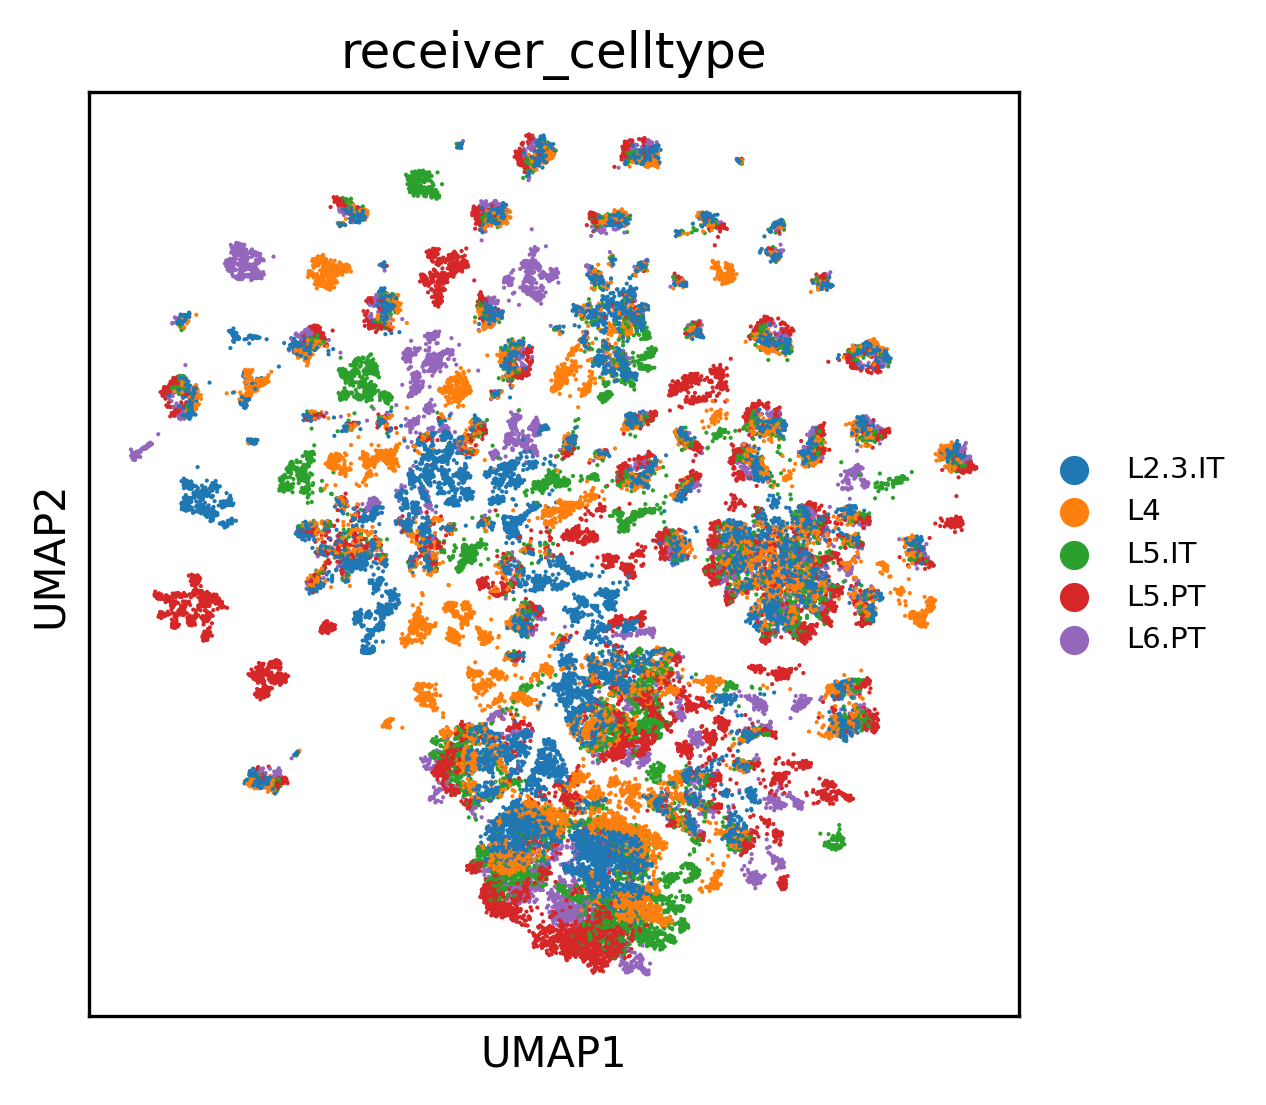

In [6]:
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):

    sc.pl.umap(CellMatrix, color='leiden_annot', palette=list(celltype_colors.values()),
              size=4,legend_loc ="right margin",legend_fontsize=7, title= 'receiver_celltype')

## Visualize cellular microenvironment

In [7]:
def convert_to_float(series):  
    try:  
        return series.astype(float)  
    except ValueError:  
        return series  
  
for col in Cell_pair.columns:  
    Cell_pair[col] = convert_to_float(Cell_pair[col])


In [8]:
suffixes = Cell_pair.columns.str.split('.').str[-1]  

new_column_names = 'Nebor-' + suffixes.unique()  
  
result_df = pd.DataFrame(index=Cell_pair.index)  

for new_name in new_column_names:  
    columns_to_average = Cell_pair.columns[suffixes == new_name.split('-')[1]]
    result_df[new_name] = Cell_pair[columns_to_average].mean(axis=1)  

/tmp/ipykernel_21821/1778017258.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[new_name] = Cell_pair[columns_to_average].mean(axis=1)
/tmp/ipykernel_21821/1778017258.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[new_name] = Cell_pair[columns_to_average].mean(axis=1)
/tmp/ipykernel_21821/1778017258.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

In [9]:
column_names = result_df.columns
df_meta = pd.DataFrame(column_names, columns=['column_name'])
df_meta['receiver'] = df_meta['column_name'].str.split('-', expand=True)[1]
df_meta =  pd.DataFrame(df_meta).set_index('column_name').rename_axis(None, axis=1)


In [10]:

selected_columns = ['receiver', 'receiver_celltype']
selected_df = metadata[selected_columns]
celltype_dict = dict(zip(selected_df['receiver'], selected_df['receiver_celltype']))
receiver = list(df_meta['receiver'])
receiver_celltpye = []
for i in range(len(receiver)):
    receiver_celltpye.append(celltype_dict.get(receiver[i]))
df_meta['receiver_celltype'] = receiver_celltpye

In [11]:
CellMatrix = sc.AnnData(result_df.T)
CellMatrix.obs = df_meta

In [12]:
sc.pp.scale(CellMatrix)
sc.tl.pca(CellMatrix)
sc.pp.neighbors(CellMatrix)
sc.tl.umap(CellMatrix)

In [13]:
celltype_colors = {  
    "L2.3.IT": "#1f77b4",  
    "L4": "#ff7f0e",
    "L5.IT": "#2ca02c",
    "L5.PT": "#d62728",
    "L6.PT": "#9467bd"
}  
CellMatrix.obs['leiden_annot'] = CellMatrix.obs['receiver_celltype'].astype('category')  
celltype_categories = list(celltype_colors.keys())  

CellMatrix.obs['leiden_annot'] = CellMatrix.obs['leiden_annot'].cat.set_categories(celltype_categories, ordered=True) 

/mnt/hpc/home/analysis/yangwenyi1/miniconda3/envs/testpypi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


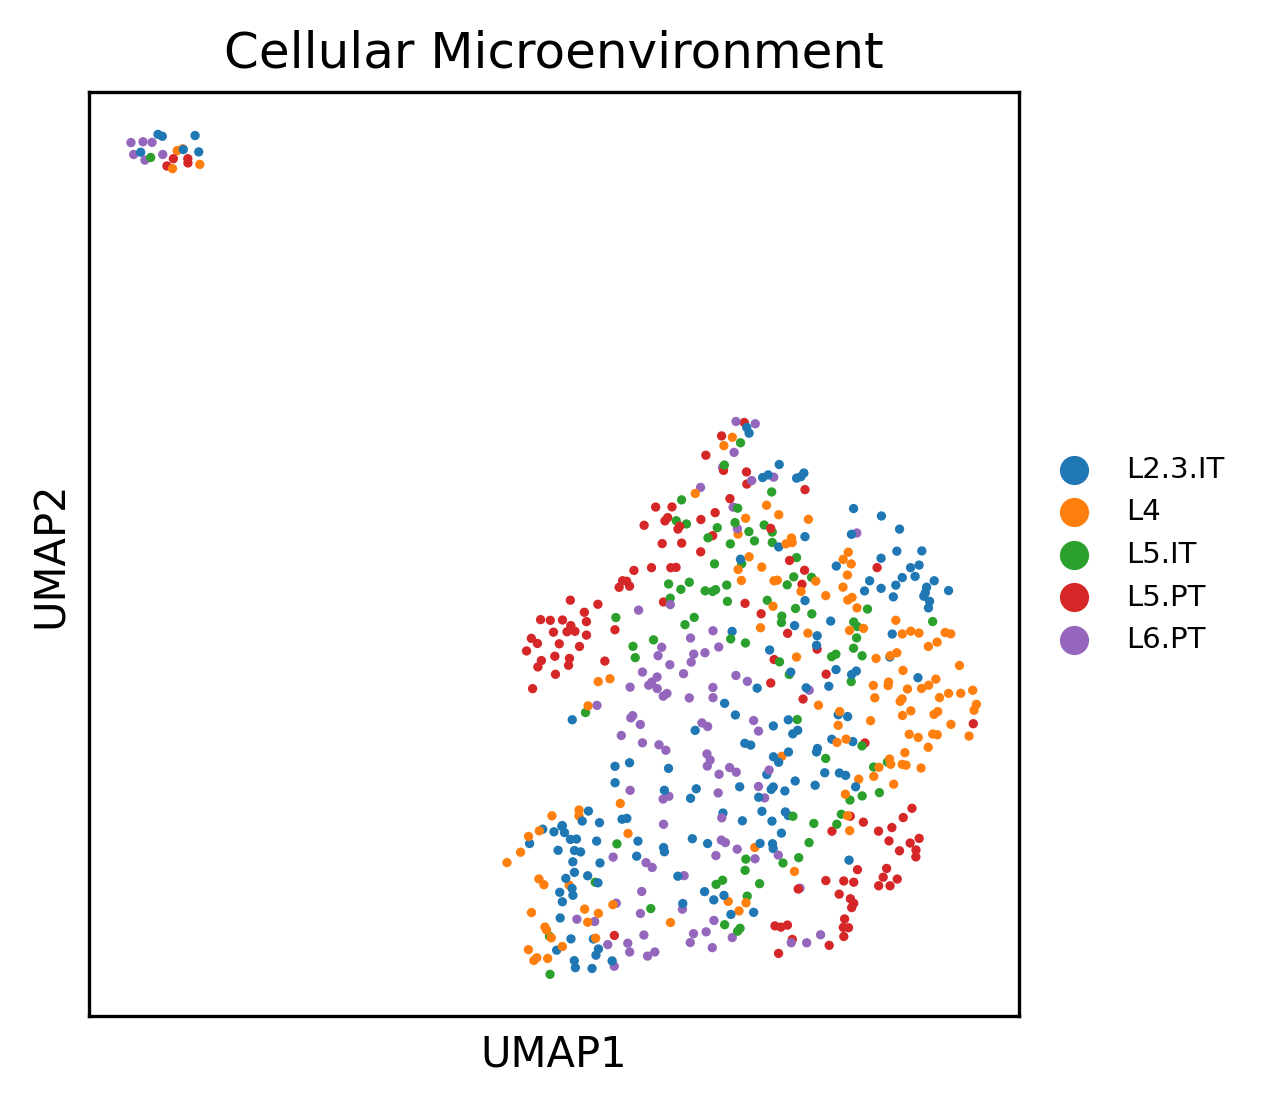

In [14]:
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):

    sc.pl.umap(CellMatrix, color='leiden_annot', palette=list(celltype_colors.values()),
              size=20,legend_loc ="right margin",legend_fontsize=7, title= 'Cellular Microenvironment')

## Using Box Plot to visualize the communication scores between adjacent and distant cell types

In [15]:
row_means = Cell_pair.T.mean(axis=1)
mean_score = pd.DataFrame(Cell_pair.T['Akt1=Chuk'])
mean_score.rename(columns={'Akt1=Chuk': 'score'}, inplace=True)
mean_score['score'] = row_means

In [16]:
df1 = st_meta
df2 = mean_score

In [17]:
total_scores_per_type = {}  
  
for celltype in set(df1['celltype']):  
    if celltype in {'L2.3.IT', 'L5.PT', 'L5.IT','L6.PT'}:
        l5_np_cells_type = df1[df1['celltype'] == celltype]['cell'].tolist()  
        l2_3_it_cells = df1[df1['celltype'] == 'L4']['cell'].tolist()  
          
        combinations = [(l5, l2) for l5 in l5_np_cells_type for l2 in l2_3_it_cells]  
          
        filtered_df2 = df2[df2.index.map(lambda x: tuple(x.split('.')) in combinations)]  
          
        total_scores_current_type = {cell: 0 for cell in l2_3_it_cells}  
          
        for index, row in filtered_df2.iterrows():  
            cell_after_dash = index.split('.')[1]  
            if cell_after_dash in total_scores_current_type:  
                total_scores_current_type[cell_after_dash] += row['score']  
          
        total_scores_per_type[celltype] = total_scores_current_type  

df_new = pd.DataFrame(total_scores_per_type)
  
print(df_new)  


           L5.PT      L6.PT    L2.3.IT      L5.IT
C382    0.000000   0.000000   0.430682   0.000000
C394    3.535030   2.628654   4.410567   1.298721
C431    0.861839   0.428951   1.310444   0.000000
C461    0.000000   0.000000   0.000000   0.000000
C473    0.000000   0.000000   0.000000   0.000000
...          ...        ...        ...        ...
C2268  18.861335  11.640185  14.915498  16.451459
C2274   0.000000   0.000000   0.000000   0.000000
C2286   5.782466   3.559038   5.826983   4.773675
C2296   1.735979   0.861377   1.331049   0.426310
C2369   3.102975   2.619168   4.416500   0.869505

[169 rows x 4 columns]


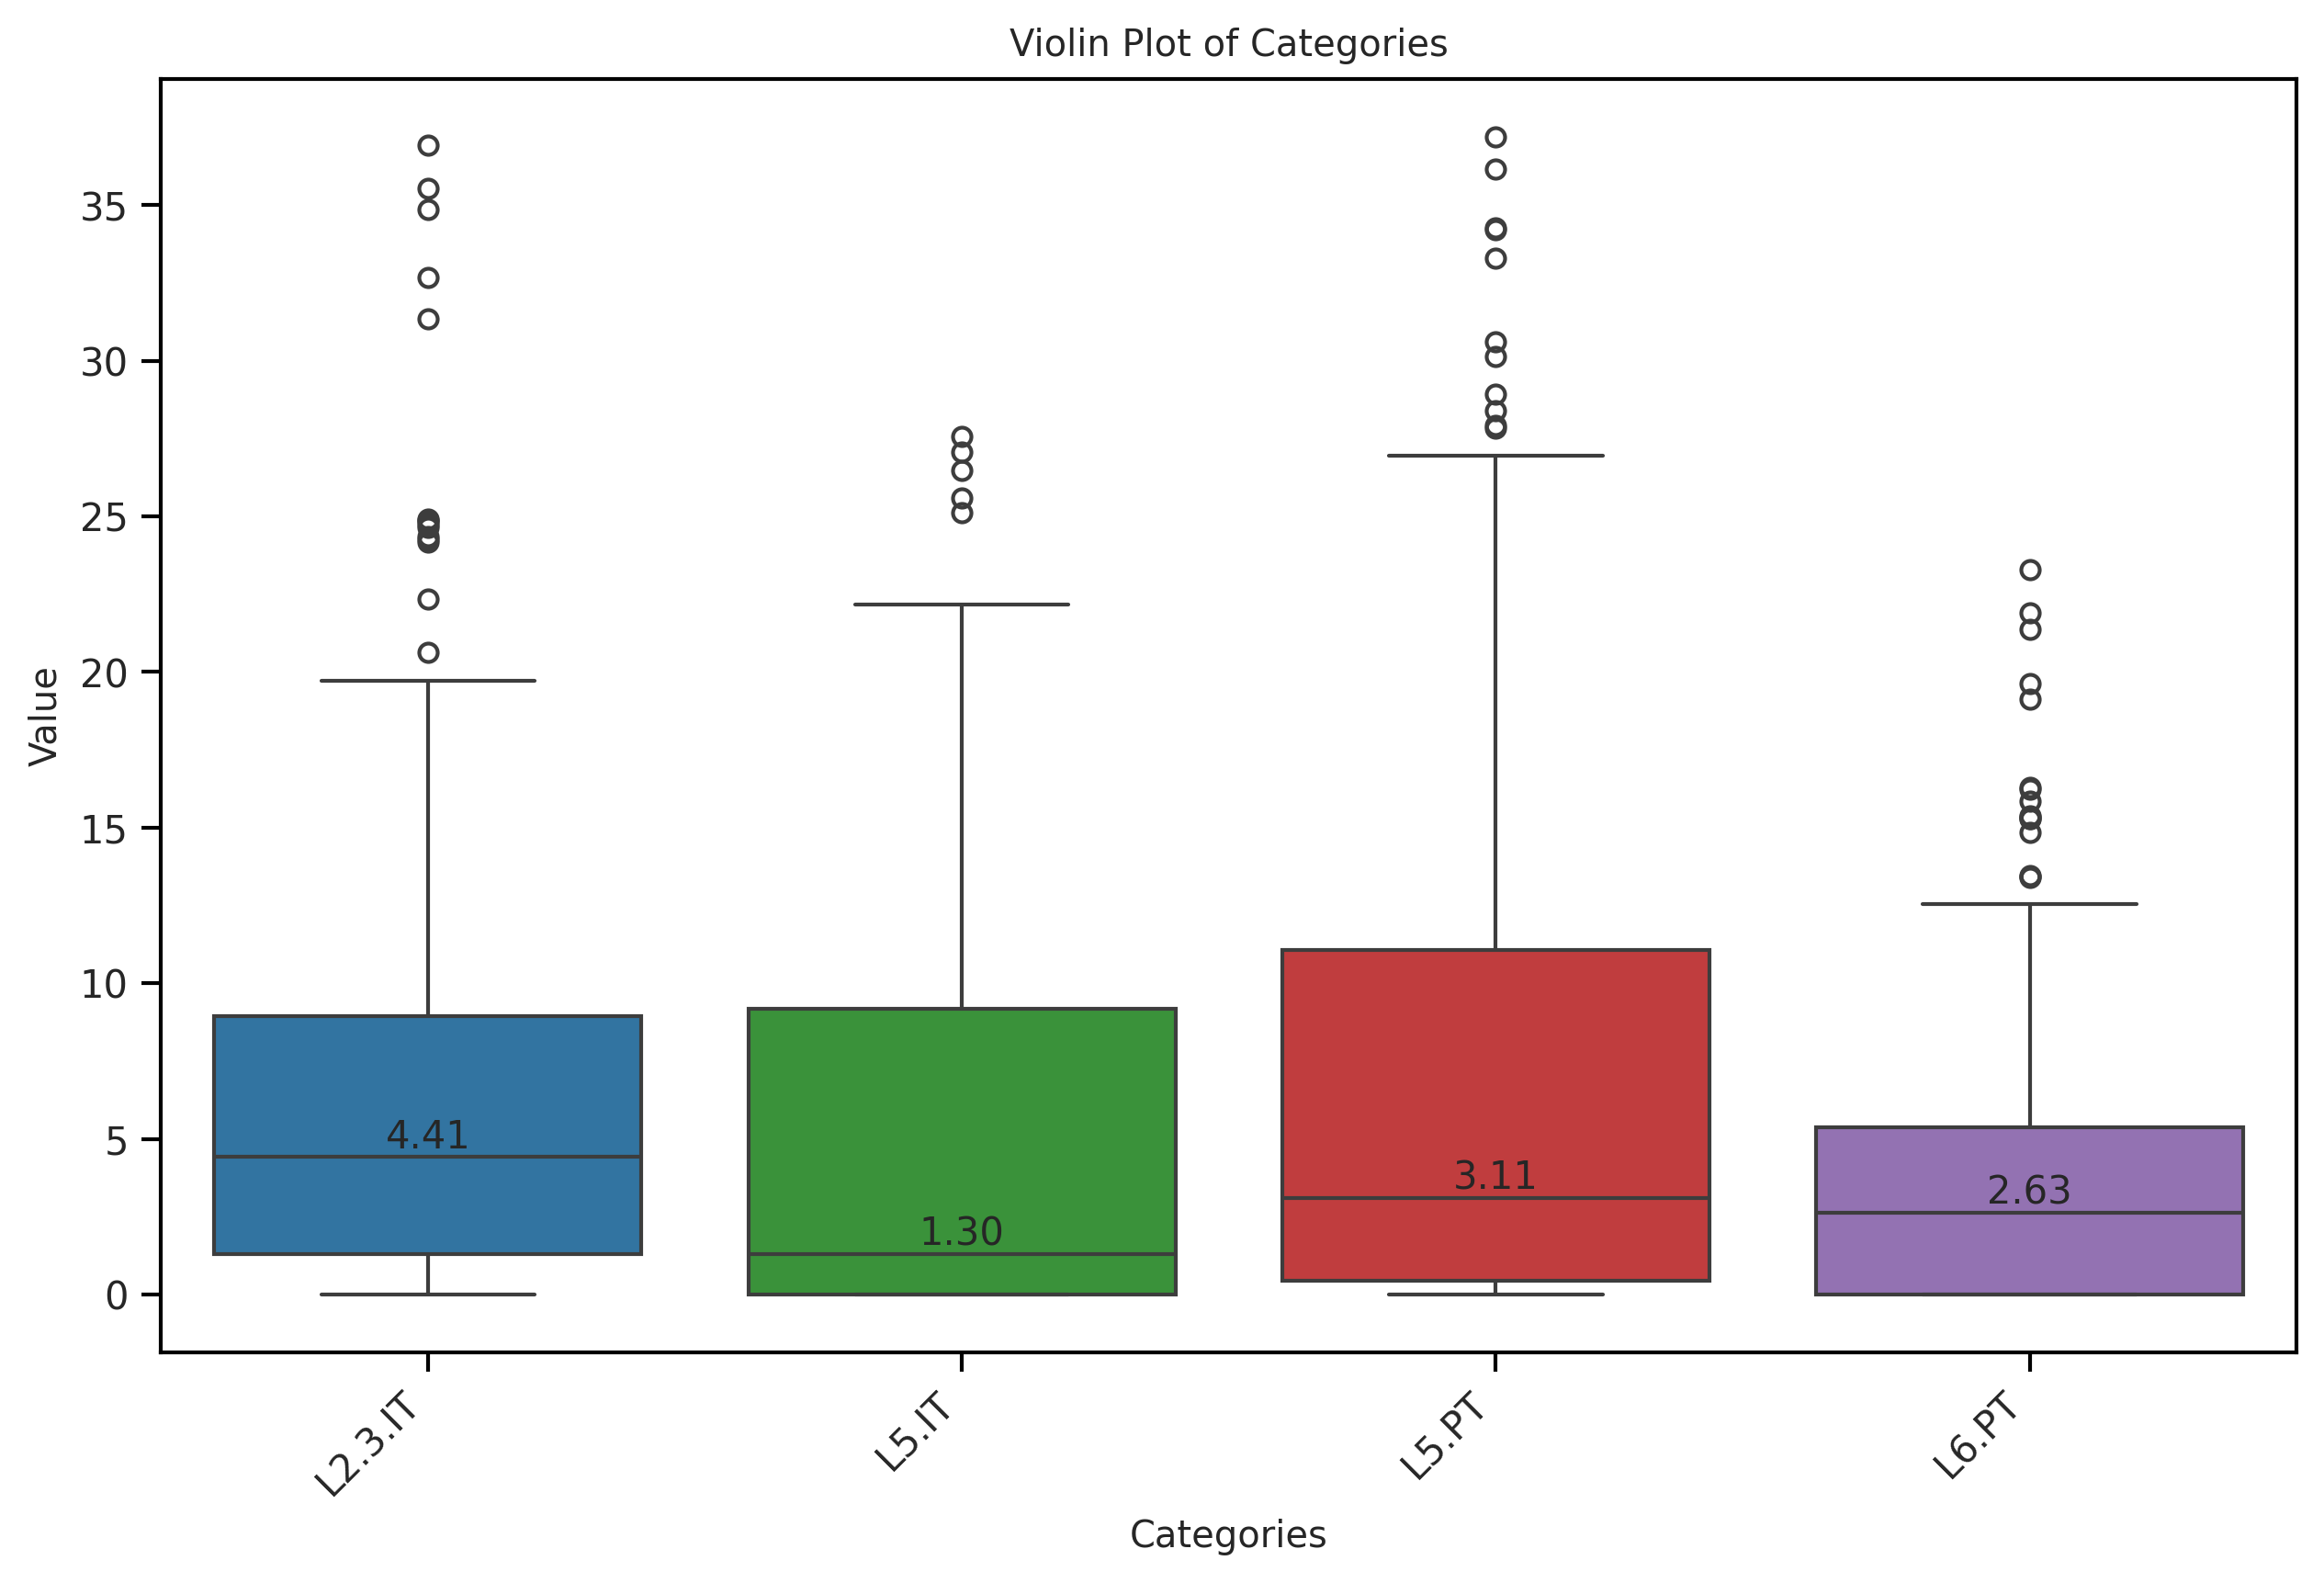

In [18]:

pivot_df = df_new
plt.figure(figsize=(10, 6), dpi=300)    
  
sns.set_style("white")    
  
sns.set_context("paper")    
  
categories = ['L2.3.IT', 'L5.IT', 'L5.PT', 'L6.PT']

sns.boxplot(data=df_new[categories], palette=["#1f77b4","#2ca02c", "#d62728", "#9467bd"],      
                order=categories)      
   
plt.xlabel('Categories')  
plt.xticks(ticks=range(len(categories)), labels=categories, rotation=45, ha='right')
  
plt.ylabel('Value')  
  
plt.title('Violin Plot of Categories')  
  
plt.gca().legend_ = None    

medians = df_new[categories].median()      
for x, (label, median) in enumerate(medians.items()):      
    plt.text(x, median + 0.02, f'{median:.2f}', ha='center', va='bottom', fontsize=10) 
    #plt.axvline(x=x+0.5, ymin=0, ymax=0.5, color='black', linestyle='--', linewidth=1)
  
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  
  
for spine in plt.gca().spines.values():  
    spine.set_visible(True)

for spine in plt.gca().spines.values():  
    spine.set_color('black')  
    spine.set_linewidth(1)  
  
plt.gca().xaxis.set_ticks_position('bottom')  
plt.gca().yaxis.set_ticks_position('left')  
  
plt.tick_params(axis='both', which='major', length=5, width=1, color='black')  

#plt.savefig('./figures/scriabin_violin_plot.pdf', format='pdf', dpi=dpi_value, bbox_inches='tight')  

plt.show()
